In [23]:
data = "Bluetooth LE Audio, in which LE stands for Low Energy, is one of the types of Bluetooth connection, the other one being Bluetooth Classic. The LE Audio not only offers a Low Energy solution for audio transmission but also low power and low bandwidth and supports low latency. The LE Audio is expected to improve upon the sound quality of the transmitted audio and will be an upgrade to Bluetooth Classic which has been used till now for transmitting audio. The reason behind this is that the “standard Bluetooth can reach a higher throughput by more frequent continuous radio usage” as per Nordic Semiconductor, a Bluetooth SIG member. On the other hand, Bluetooth LE is about conserving power and hence, uses its radio for the shortest possible time.\nThe Bluetooth LE Audio was announced by Bluetooth SIG at CES 2020 and is expected to come to the next-gen Apple AirPods along with support for the LC3 codec."

In [24]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
import re
data = re.sub(r"[^\w]"," ",data)

In [26]:
from nltk.tokenize import word_tokenize
tokenize = word_tokenize(str(data))

In [27]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

filtered = []

for i in tokenize:
  filtered.append(lemmatizer.lemmatize(i))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [28]:
nltk.download('stopwords') 
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

wordsFiltered=[]

for w in filtered:
  if w not in stopwords:
    wordsFiltered.append(w)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
wordsFiltered[:5]

['Bluetooth', 'LE', 'Audio', 'LE', 'stand']

In [30]:
from time import time

In [31]:
def generate_ngrams(ls, n):
    ngrams = zip(*[ls[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

In [32]:
start = time()
ngrams = generate_ngrams(wordsFiltered,2)
end = time()

In [33]:
print("Time taken ngrams:",end-start)

Time taken ngrams: 8.559226989746094e-05


In [34]:
ngrams[:5]

['Bluetooth LE', 'LE Audio', 'Audio LE', 'LE stand', 'stand Low']

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
start = time()

countvec = CountVectorizer()
cdf = countvec.fit_transform(wordsFiltered)
bow = pd.DataFrame(cdf.toarray(), columns = countvec.get_feature_names())
bow

end = time()

print("Time taken Bag of Words:",end-start)

Time taken Bag of Words: 0.011966466903686523


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
start = time()
tfidf = TfidfVectorizer()
result = tfidf.fit_transform(wordsFiltered)
end = time()
print("Time taken TFIDF:",end-start)

Time taken TFIDF: 0.02084183692932129


In [38]:
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names(), tfidf.idf_):
    print(ele1, ':', ele2)


idf values:
2020 : 4.912023005428146
airpods : 4.912023005428146
along : 4.912023005428146
also : 4.912023005428146
announced : 4.912023005428146
apple : 4.912023005428146
audio : 3.5257286443082556
bandwidth : 4.912023005428146
behind : 4.912023005428146
bluetooth : 3.302585092994046
ces : 4.912023005428146
classic : 4.506557897319982
codec : 4.912023005428146
come : 4.912023005428146
connection : 4.912023005428146
conserving : 4.912023005428146
continuous : 4.912023005428146
energy : 4.506557897319982
expected : 4.506557897319982
frequent : 4.912023005428146
gen : 4.912023005428146
ha : 4.912023005428146
hand : 4.912023005428146
hence : 4.912023005428146
higher : 4.912023005428146
improve : 4.912023005428146
latency : 4.912023005428146
lc3 : 4.912023005428146
le : 3.659260036932778
low : 3.8134107167600364
member : 4.912023005428146
next : 4.912023005428146
nordic : 4.912023005428146
offer : 4.912023005428146
on : 4.912023005428146
one : 4.506557897319982
per : 4.912023005428146
pos

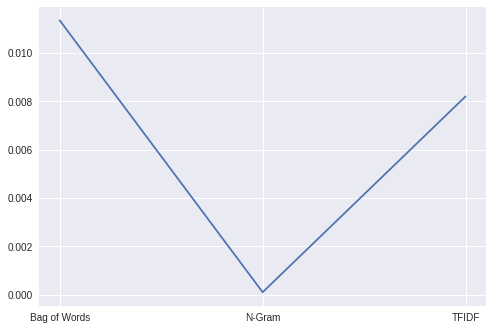

In [40]:
import matplotlib.pyplot as plt
x = ["Bag of Words","N-Gram","TFIDF"]
y = [0.0113394,0.0001106,0.0081996]
plt.plot(x,y)
plt.show()